# Welcome to the Pneumonia Image Classifier
## In this notebook we're going to train a Neural Network to detect pneumonia in images.

### Let's get started by importing our libraries

In [19]:
from __future__ import print_function
import keras
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.datasets import mnist
from keras import backend as K

from sklearn.metrics import classification_report, confusion_matrix



### Let's take a look at the images.
### Here is what an image of a normal X-ray looks like

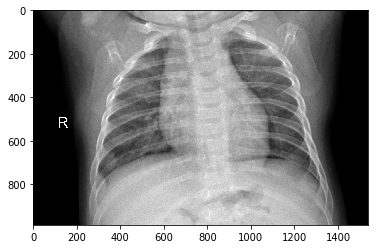

In [2]:
img_name = 'IM-0354-0001.jpeg'
img_normal = load_img('./input/train/NORMAL/' + img_name)
plt.imshow(img_normal)
plt.show()

### And here is the X-ray of pneumonia

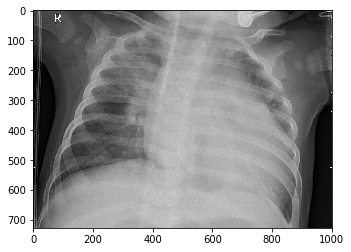

In [3]:
img_name = 'person689_bacteria_2586.jpeg'
img_normal = load_img('./input/train/PNEUMONIA/' + img_name)
plt.imshow(img_normal)
plt.show()

### Let's create a reference to our data directories

In [4]:
train_data_dir = './input/train'
test_data_dir = './input/test'
val_data_dir = './input/val'

### Define some variables that we're going to use in training and testing

In [5]:
nb_train_samples = 5217
nb_validation_samples = 17
epochs = 20
batch_size = 16

### Shape our input

In [6]:
# dimensions of our images.
img_width, img_height = 150, 150

input_shape = (img_width, img_height, 3)
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)

### Given the size of our dataset, we'll need to use generators in order to feed the data to our model bit-by-bit
### Let's create our generators

In [7]:
train_gen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [8]:
test_gen = ImageDataGenerator(rescale=1. / 255)

In [9]:
train_generator = train_gen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [10]:
test_generator = test_gen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [11]:
validation_generator = test_gen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


### Now let's initialize our model

In [12]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

### Compile it

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Fit it using our training generator... it's going to take a while

In [14]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
326/326 [==============================] - 202s 619ms/step - loss: 0.4587 - acc: 0.8016 - val_loss: 0.4355 - val_acc: 0.8125
Epoch 2/20
326/326 [==============================] - 192s 590ms/step - loss: 0.3200 - acc: 0.8777 - val_loss: 0.7359 - val_acc: 0.6250
Epoch 3/20
326/326 [==============================] - 183s 562ms/step - loss: 0.2656 - acc: 0.9015 - val_loss: 0.5253 - val_acc: 0.8125
Epoch 4/20
326/326 [==============================] - 198s 607ms/step - loss: 0.2493 - acc: 0.9099 - val_loss: 0.6035 - val_acc: 0.8125
Epoch 5/20
326/326 [==============================] - 215s 659ms/step - loss: 0.2240 - acc: 0.9178 - val_loss: 1.2967 - val_acc: 0.6250
Epoch 6/20
326/326 [==============================] - 213s 653ms/step - loss: 0.2322 - acc: 0.9216 - val_loss: 0.6604 - val_acc: 0.8125
Epoch 7/20
326/326 [==============================] - 214s 658ms/step - loss: 0.2197 - acc: 0.9216 - val_loss: 0.8091 - val_acc: 0.7500
Epoch 8/20
326/326 [============================

### Now let's evaluate it using our test generator

In [15]:
score = model.evaluate_generator(test_generator, math.ceil(5217 / batch_size), verbose=1)

327/327 [==============================] - 97s 296ms/step


In [16]:
score

[0.5509939826398359, 0.8612385321100917]

In [18]:
y_pred = model.predict_generator(test_generator, math.ceil(5217 / batch_size), verbose=1)

327/327 [==============================] - 97s 296ms/step


In [32]:
cm_y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, cm_y_pred)

Confusion Matrix


ValueError: Found input variables with inconsistent numbers of samples: [16, 5232]

In [ ]:
def cmat_(cm, labels=None):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="g", ax=ax)
    
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    
    if labels:
        ax.xaxis.set_ticklabels(labels)
        ax.yaxis.set_ticklabels(labels)
    plt.show()
    
cmat_(cm)

In [25]:
model.save('my_model.h5')